In this notebook -
* Overriding forward method in LinearRegressionModel
* Inference methods available
* Plotting

# PyTorch workflow

End-to-end workflow

https://www.learnpytorch.io/01_pytorch_workflow/

:![picture](/content/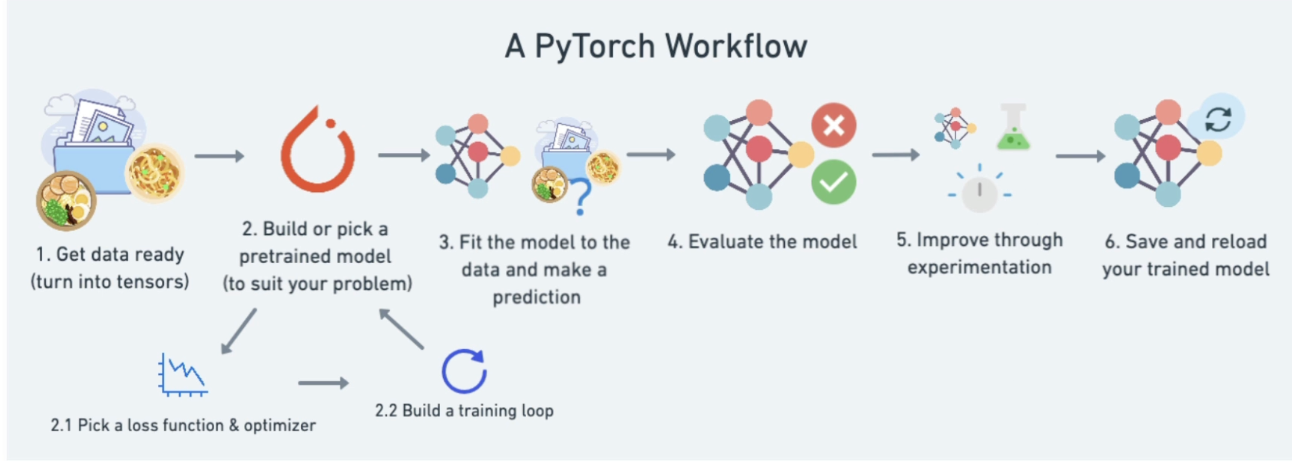workflow_example.png)

In [1]:
what_we_are_covering = {1: "data (prepare and load)",
                        2: "build model",
                        3: "fitting thw model to data (training)",
                        4: "making predictions (inference) and evaluating a model",
                        5: "saving and loading a model",
                        6: "putting it all together"}

In [2]:
import torch
from torch import nn # nn contains all of pytorch's building blocks for neural networks

In [3]:
# nn components - graphs - computational graphs
import matplotlib.pyplot as plt

# check pytorch version
torch.__version__

'2.1.0+cu118'

## 1. Data (preparing and loading)

Data can be anything in ML:
* Excel spreadsheet
* Images of any kind
* Videos (example youtube data)
* Audio
* DNA
* Text

ML is a game of two parts:
1. Get data into a numerical representation.
2. Build a a model to learn patterns in that numerical representation.

To showcase this, let's create some 'known' data using linear regression formula.

Y = a+bX

We'll use a linear regression formula to make a straight line with *known* **parameters**.

parameter is something a model learns

In [4]:
# create known params
weight = 0.7 # a in a+bX
bias = 0.3 # b in a+bX
# create
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1) # unsqueeze for one extra bracket
# will need that extra bracket later...
y = weight * X + bias

X[:10], y[:10], len(X), len(y)

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]),
 50,
 50)

In [5]:
# we know the relationship is y=a+bX but we won't know everytime
# we'll try to figure out the relationship from the data

### Splitting data in training and test sets

Generalization - ability of ML model to perform well on data it hasn't seen before

In [6]:
#create train-test split
train_split = int(0.8 * len(X))
train_split

40

In [7]:
# using indexing
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]
# we can do it with scikit-learn as well with randomness; will see later
len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

How might we better visualize our data?

In [8]:
def plot_predictions(train_data = X_train,
                     train_labels = y_train,
                     test_data = X_test,
                     test_labels = y_test,
                     predictions = None):
  """
  Plots training data, test data and compares predictions.
  Data explorer's motto: Visualize, visualize, visualize!!!
  """
  plt.figure(figsize = (8,6))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  # Are there predictions
  if predictions is not None:
    #plot the predictions if they exist
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")
  #show legend
  plt.legend(prop={"size":14})

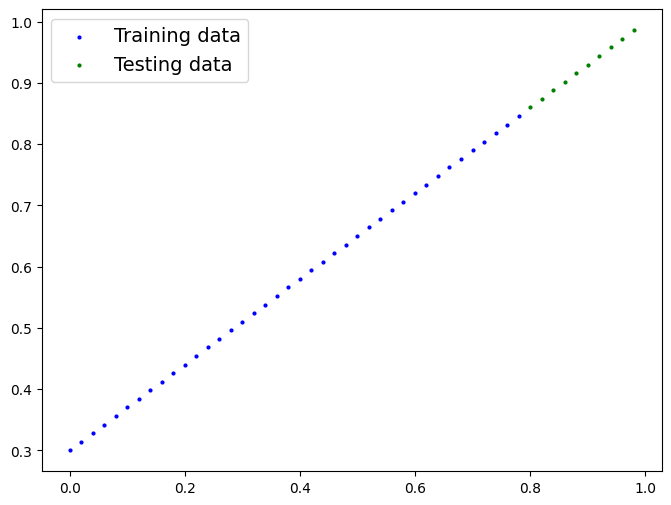

In [9]:
plot_predictions() # we don't have red prediction dots since no predictions are there yet

## 2. Build model

Our first PyTorch model in this repo!

Let's go for it!!!!

What the model does:
* start with random values
* look at training data
* adjust the random values to better represent the data
* represent or get closer to the ideal values, the bias and weight we used to create the data


How does it do so?

Two main algorithms -
1. Gradient descent - we need to keep requires_grad = True for this reason. PyTorch is going to keep track of the gradients of the weights and bias parameter when we run the computations and update them via these 2 algos.
2. Backpropagation

In [10]:
# linear regression model from scratch
# create a LR model class
# almost everything in pytorch inherits from nn.Module
# Documentation says your modules should also subclass this class
# Documentation says modules can also contain other modules - nesting in tree structure
class LinearRegressionModel(nn.Module):
  def __init__(self): # constructor
    super().__init__()
    # Parameter is a tensor
    # start with random numbers -> look at data -> update the tensors
    self.weights = nn.Parameter(torch.randn(1, # start with random, go to ideal
                                            requires_grad=True,
                                            dtype=torch.float)) # pytorch loves dtype float32
    self.bias = nn.Parameter(torch.randn(1,
                                         requires_grad=True,
                                         dtype=torch.float))
  # Forward method to define computation in the model
  def forward(self, x: torch.Tensor) -> torch.Tensor:
    # "x" is the input data
    return self.weights * x + self.bias # LR formula

In [11]:
# Later on with large models, we will create whole layers,
# list of layers etc.,. we will
# no need to initialize weights and bias explicitly.
# requires_grad=True + torch.autograd to implement grad descent
# any subclass/child class of nn.Module needs to
# override the forward() method like we did
# forward defines the computation strategy of the algorithm

### Pytorch main classes for model building essentials-
* torch.nn - all building blocks for computational graphs (Neural networks)
* a neural network can be considered as a computational graph
* torch.nn.Parameter - what parameters should our model try and learn, often a PyTorch layer from torch.nn will set these for us
* torch.nn.Module - base class for all NN modules. If you subclass it, you should overwrite forward()
* torch.optim - this is where optimizers in PyTorch live that will help in gradient descent
* def forward() - All nn.Module subclasses require you to overwrite forward(); this method defines what happens in the forward computation.
* Helpful when we have a complicatd dataset:
* torch.utils.data.Dataset -
* torch.utils.data.DataLoader -

In [12]:
# torchvision.models - use a pretrained model (CV)
# dataloader, data creator
# optimizer
# torchmetrics
# for experimentation - torch.utils.tensorboard

### checking the contents of out PyTorch model

now we have created the model, let's see what it has inside

we can check the modekl parameters and what is inside using .parameters()

In [12]:
# create a random seed
torch.manual_seed(42)

In [13]:
# create an instance of the model (this is a subclass of nn.Module)
model_0 = LinearRegressionModel()
model_0

LinearRegressionModel()

In [14]:
# check out the parameters
model_0.parameters()

<generator object Module.parameters at 0x7a2816f68f90>

In [15]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [16]:
torch.randn(1)
# why is there a difference in random values in function and here?
# because there no random seed

tensor([0.2345])

In [17]:
torch.manual_seed(42)
torch.randn(1)

tensor([0.3367])

In [18]:
# list named parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [19]:
weight, bias # perfect ones that parameters have to tune to approx
# we don't know what the ideal values are in real world scenarios

(0.7, 0.3)

### Making predictions using `torch.inference_mode()`

To check our model's predictive power, let's see how well it predicts `y_test` based on `X_test`.

When we pass data to our model, it runs through the `forward()` method

In [31]:
# Make predictions with model
with torch.inference_mode():
  y_preds = model_0(X_test)
y_preds

# NOT IMPLEMENTED ERROR: BECUSE OF INDENTATION ERROR IN THE CLASS FOR FORWARD METHOD

NotImplementedError: ignored

In [20]:
# Make predictions with model
with torch.inference_mode():
  y_preds = model_0(X_test)
y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

In [21]:
y_test

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

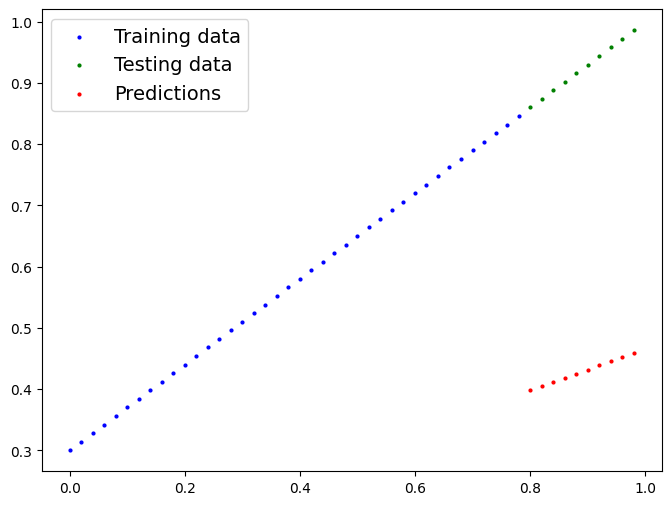

In [23]:
plot_predictions(predictions=y_preds)

In [41]:
# random predictions because of random initialization of weights

In [22]:
# next will do - add code to minimise distance between actual and predicted data

In [24]:
# we can also use :
y_preds = model_0(X_test)
y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]], grad_fn=<AddBackward0>)

In [25]:
# why torch.inference_mode()?
# no  grad_fn=<AddBackward0>
# turns off the gradient tracking
# during testing we do not need this tracking
# hence pytorch is keeping track of less data(no test data) at the backend

In [26]:
# another way
with torch.no_grad():
  y_preds = model_0(X_test)
# according to PyTorch, replace no_grad with inference_mode() context manager
# because it is faster, has other advantages as well